# Chapter 3: Active Filters Part I

## Example 3.1, Page 111

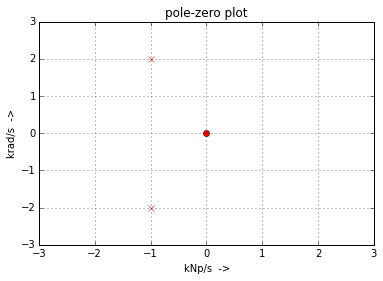

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy as np

#Graph 

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel("kNp/s  ->")
plt.ylabel("krad/s  ->")
plt.plot(-1,-2,"xr")
plt.plot(-1,2,"xr")
plt.plot(0,0,"or")
plt.grid(True)
plt.title("pole-zero plot")

## Example 3.3, Page 113

In [8]:
import math
import numpy as np

#Variable Declaration

R=10.0             # ohm
C=40*10**(-6)      # farad
L=5*10**(-3)       # H

#Calculation

s=complex(0,10**3)
Hsnum=(R/L)*s
Hsden=((s**(2))+(R/L)*s+(1.0/(L*C)))
Hs=Hsnum/Hsden               #Transfer Function 
Hsmag=10*abs(Hs)
Hsphase1=math.atan(Hs.imag/Hs.real)
Hsphase=(Hsphase1*(180.0/np.pi))+45

#answer

print "v0(t) =",round(Hsmag,3),"cos ((10ˆ3) t +",round(Hsphase,2),") V"

v0(t) = 4.472 cos ((10ˆ3) t + 108.43 ) V


## Example 3.4, Page 119

In [9]:
import math
import numpy as np
from sympy.mpmath import *
from sympy import Symbol,solve,N

#Variable declaration

gain = 20    # dB

#Calculation

gain=pow(10,gain/gain)

R1 = 20         # kilo ohm, Assumption
R2 = 10*R1      # kilo ohm
C = round(10/(2*np.pi*2),3)
R2 = C*R2
R1 = R2/10

f = Symbol("f");
ans = solve(1+(f**2)/(10**6)-100,f)
ans = round(N(ans[1])/1000,3)
phase=round(180-degrees(atan(ans)),1)

#answer

print "a)\n  R1 =",R1,"kilo ohm\n  R2 =",R2,"kilo ohm"
print "b)\n  Frequency =",ans,"kHz\n  Phase =",phase,"degree"

# part (a) answer in book less due to precision of pi

a)
  R1 = 15.92 kilo ohm
  R2 = 159.2 kilo ohm
b)
  Frequency = 9.95 kHz
  Phase = 95.7 degree


## Example 3.5, Page 121

In [10]:
import numpy as np
import math

#Variable Declaration

gain = 20    # dB

#Calculation

gain=pow(10,gain/gain)

R1 = 10         # kilo ohm, Assumption
R2 = 10*R1      # kilo ohm
c1 = round(1/(2*np.pi*20)*100,4)              # rescaling the resistances
R1 = round(R1*c1,2)
R2 = 10*R1
c2 = round(1/(2*np.pi*20*R2)*(10**4))
print "R1 =",R1,"kilo ohm\nR2 =",R2,"kilo ohm\nC1 =",c1,"micro farad\nC2 =",c2,"pico farad"

# error in book answer

R1 = 7.96 kilo ohm
R2 = 79.6 kilo ohm
C1 = 0.7958 micro farad
C2 = 1.0 pico farad


## Example 3.6, Page 123

In [11]:
import numpy as np
import math

#Variable Declaration

GdB=40        # dB

#Calculation

GdBf2=GdB+20
Gf2=10**(GdBf2/20)
C2=10*(10**(-9))        # assumed value of c2
f1=500                  # Hz
f2=50                   # Hz
f3=2122                 # Hz
w1=2*np.pi*f1
w2=2*np.pi*f2
w3=2*np.pi*f3
R2=(1.0/(w2*C2)) -2309.8862
C3=((1.0/R2)-(w1*C2))/(w1-w3)
R3=(1.0/(w3*C3))+(0.94*(10**3))
R1=((R2+R3)/Gf2)-4
C1=(1.0/(2*np.pi*20*R1))+(10*(10**(-6)))     # here f= 20 hz as it is the lower limit of the audio range

#answer

print ("Designed RIAA phono Amplifier : ") 
print "R1 =",round(R1),"ohm" 
print "R2 =",round(R2*(10**(-3))),"kilo ohm" 
print "R3 =",round(R3*(10**(-3))),"kilo ohm" 
print "C1 =",round(C1*(10**6)),"micro farad" 
print "C2 =",round(C2*(10**9)),"nF" 
print "C3 =",round(C3*(10**9) -0.1,1),"nF"


Designed RIAA phono Amplifier : 
R1 = 340.0 ohm
R2 = 316.0 kilo ohm
R3 = 28.0 kilo ohm
C1 = 33.0 micro farad
C2 = 10.0 nF
C3 = 2.7 nF


## Example 3.7, Page 125

In [12]:
import numpy as np
import math

#Variable Declaration

GdB=20          # dB
fB=30           # Hz
fT=10*(10**3)   # Hz

#Calculation

G=10**(GdB/20)        #((R2+R1)/R1)=G and ((R1+R3+2R5)/R3)=G
R2=100*(10**3)        #Assume R2 be a 100 kilo ohm pot 
R1=R2/(G-1)
R5=R1                 #Arbitraly chosen value 
R3=((R1+(2*R5))/(G-1)) -(0.1*(10**3))
R4min=R1+R3+2*R5+400                   #R4>>(R1+R3+2R5) 
R4=500*(10**(3))                       #Let R4 be a 500 kilo ohm pot 
C1=(1/(2*np.pi*R2*fB))
C2=(1/(2*np.pi*R3*fT))+0.9*(10**(-9))   #0.6 nF is added for standardisation 

#answer

print "Designed Bass/Trebble Control :" 
print "R1 =",round(R1*(10**(-3))),"kilo ohm" 
print "R2 =",round(R2*(10**(-3))),"kilo ohm"
print "R3 =",round(R3*(10**(-3)),1),"kilo ohm"
print "R4 =",round(R4*(10**(-3))),"kilo ohm" 
print "R5 =",round(R5*(10**(-3))),"kilo ohm" 
print "C1 =",round(C1*(10**9) -2.05),"nF" 
print "C2 =",round(C2*(10**9) -0.22,1),"nF"


Designed Bass/Trebble Control :
R1 = 11.0 kilo ohm
R2 = 100.0 kilo ohm
R3 = 3.6 kilo ohm
R4 = 500.0 kilo ohm
R5 = 11.0 kilo ohm
C1 = 51.0 nF
C2 = 5.1 nF


## Example 3.8, Page 135

In [13]:
import math
import numpy as np

#Variable Declaration

f0=1*(10**3)          # Hz
Q=5.0

#Calculation

C=10*(10**(-9))               # Arbitrarily chosen value 
R=1/(2*np.pi*f0*C)
K=3-(1.0/Q)                     #DC gain 
RA=10*(10**3)                 #Assumed value of RA 
RB=((K-1)*RA) -200
C1=C
C2=C

#answer

print "Designed Equal Component Second Order Low Pass Filter : "
print "R =",round(R*(10**(-3)),2),"kilo ohm"
print "RA =",round(RA*(10**(-3)),2),"kilo ohm" 
print "RB =",round(RB*(10**(-3)),2),"kilo ohm"
print "C =",round(C*(10**9),2),"nF"
print "DC gain =",K,"V/V"

# precison error in book answer

Designed Equal Component Second Order Low Pass Filter : 
R = 15.92 kilo ohm
RA = 10.0 kilo ohm
RB = 17.8 kilo ohm
C = 10.0 nF
DC gain = 2.8 V/V


## Example 3.9, Page 136

In [14]:
import math
#Variable Declaration

AnewdB=0     # dB

#Calculation

                               #Applying Thevenin ’ s theorem
                               #Anew=(R1B/(R1A+R1B) ) Aold and R1A || R1B =R1
Anew=10**AnewdB
C=10*(10**(-9))
Aold=2.8                      #Obtained from Example 3.8 
RA=10*(10**3)                 #Assumed value of RA 
RB=17.8*(10**3) 
R1=15915.494                 # obtained from Example 3.8 
R2=R1
R1A=R1*(Aold/Anew)
R1B=R1/(1-(Anew/Aold))

#answer

print "Designed Second Order Low Pass Filter for 0 dB dc gain : "
print "R1A =",round(R1A*(10**(-3)),2),"kilo ohm"
print "R1B =",round(R1B*(10**(-3)),2),"kilo ohm"
print "R2 =",round(R2*(10**(-3)),2),"kilo ohm"
print "RA =",round(RA*(10**(-3)),2),"kilo ohm"
print "RB =",round(RB*(10**(-3)),2),"kilo ohm"
print "C =",round(C*(10**9),2),"nF"

Designed Second Order Low Pass Filter for 0 dB dc gain : 
R1A = 44.56 kilo ohm
R1B = 24.76 kilo ohm
R2 = 15.92 kilo ohm
RA = 10.0 kilo ohm
RB = 17.8 kilo ohm
C = 10.0 nF


## Example 3.10, Page 137

In [15]:
import math
import numpy as np

#Variable Declaration

Q=2.0
f0=10*(10**3)       # Hz

#Calculation

C=1*(10**(-9))
n=(4*(Q**2))+4
C1=n*C
C2=C
k=(n/(2*(Q**2)))-1
m=k+(((k**2)-1)**0.5)
k1=(m*n)**0.5
R=1/(k1*2*np.pi*f0*C)
R2=R
R1=m*R

#answer

print "a) Designed Unity Gain Low Pass Filter : "
print "   R1 =",round(R1*(10**(-3)),3),"kilo ohm"
print "   R2 =",round(R2*(10**(-3)),3),"kilo ohm"
print "   C1 =",round(C1*(10**9),1),"nF"
print "   C2 =",round(C2*(10**9),1),"nF"

a) Designed Unity Gain Low Pass Filter : 
   R1 = 5.758 kilo ohm
   R2 = 2.199 kilo ohm
   C1 = 20.0 nF
   C2 = 1.0 nF


## Example 3.11, Page 137

In [16]:
import cmath
import math
import numpy as np

#Variable Declaration

m=1.0              #Q is maximised at m=1 
n=2.0              # Order of filter 
f0=10*10**(3)      # Hz

#Calculation

Qnum=sqrt(m*n)
Qden=m+1
Q=Qnum/Qden
C=1*10**(-9)     #Assuming C=1 nF
C2=C
C1=n*C
R=1.0/(Qnum*C*2.0*np.pi*f0)
R2=R
R1=m*R
w=4*np.pi*10**4
f=2*10**4                      # Hz
Hw=1.0/complex(1-(w**(2)*R1*R2*C1*C2),(w*((R1*C2)+(R2*C2))));
Vom=10*abs(Hw);
an=atan(Hw.imag/Hw.real) 
theta=180-(an*(180/np.pi))           # radian to degree
theta0=theta -90

#answer

print "a)Designed Second Order Low Pass Butterworth Filter : " 
print "  R1 =",round(R1*10**(-3),2),"kilo ohm"
print "  R2 =",round(R2*10**(-3),2),"kilo ohm"
print "  C1 =",C1*10**9,"nF"
print "  C2 =",C2*10**9,"nF"
print "b)vo( t ) =",round(Vom,3),"cos (4∗pi ∗(10ˆ4)∗t+",round(theta0,2),") V"

a)Designed Second Order Low Pass Butterworth Filter : 
  R1 = 11.25 kilo ohm
  R2 = 11.25 kilo ohm
  C1 = 2.0 nF
  C2 = 1.0 nF
b)vo( t ) = 2.425 cos (4∗pi ∗(10ˆ4)∗t+ 46.69 ) V


## Example 3.12, Page 139

In [17]:
import math
import numpy as np

#Variable Declaration

f0 = 200.0               # Hz
Q = 1.5

#Calcualtion

C=0.1*10**(-6)           # Assumption
C1=C
C2=C
n=C1/C2
m=n/(((n+1)*Q)**2)
R=1.0/(2*np.pi*f0*sqrt(m*n)*C)
R2=R
R1=m*R

#asnwer

print "Designed High Pass KRC Filter : "
print "R1 =",round(R1*10**(-3),3),"kilo ohm"
print "R2 =",round(R2*10**(-3),2),"kilo ohm"
print "C1 =",round(C1*10**6,1),"micro farad"
print "C2 =",round(C2*10**6,1),"micro farad"

Designed High Pass KRC Filter : 
R1 = 2.653 kilo ohm
R2 = 23.87 kilo ohm
C1 = 0.1 micro farad
C2 = 0.1 micro farad


## Example 3.13, Page 140

In [18]:
import math
import numpy as np

#Variable Declaration

f0 = 1*10**3         # Hz
BW = 100.0           # Hz
RG1dB=20             # dB

#Calculation

C=10*10**( -9)                   # Assumed
C1=C
C2=C                             # equal component option
R = math.sqrt(2)/(2*np.pi*f0*C)
R1=R2=R3=R
Q=f0/BW
K=4 -(math.sqrt(2)/Q)
RA =10*10**3
RB=(K-1)*RA
RG=K/(4-K)
RG1=10**(RG1dB/20)
R1A=(R1*(RG/RG1))+488.81355
R1B=(R1/(1-(RG1/RG)))+169.90124

#answer

print "a)Designed KRC Second Order Band Pass filter:"
print "  R1 = R2 = R3 =",round(R*10**( -3),1),"kilo ohm"
print "  RA =",round(RA*10**(-3),2),"kilo ohm"
print "  RB =",round(RB*10**(-3),2),"kilo ohm"
print "  C1 = C2 =",round(C*10**9,2),"nF"
print "  Resonance Gain =",round(RG,2),"V/V"
print "b)Designed KRC Second Order Band Pass filter with 20 dB Resonance Gain"
print "  R1A =",round(R1A*10**(-3),2),"kilo ohm"
print "  R1B =",round(R1B*10**(-3),2),"kilo ohm"
print "  R1 =",round(R1*10**(-3),2),"kilo ohm"
print "  RB =",round(RB*10**(-3),2),"kilo ohm"
print "  C1 = C2 =",round(C*10**9,2),"nF"

a)Designed KRC Second Order Band Pass filter:
  R1 = R2 = R3 = 22.5 kilo ohm
  RA = 10.0 kilo ohm
  RB = 28.59 kilo ohm
  C1 = C2 = 10.0 nF
  Resonance Gain = 27.28 V/V
b)Designed KRC Second Order Band Pass filter with 20 dB Resonance Gain
  R1A = 61.9 kilo ohm
  R1B = 35.7 kilo ohm
  R1 = 22.51 kilo ohm
  RB = 28.59 kilo ohm
  C1 = C2 = 10.0 nF


## Example 3.14, Page 141

In [19]:
import math
import numpy as np

#Variable Declaration

f0=60.0            #Hz
BW=5.0             #Hz

#Calculation

C=100*10**(-9)           #Assumption
C1=C
C2=2*C
R=1.0/(2*np.pi*f0*C)
R1=R
R2=R/2.0
Q=f0/BW
K=(4-(1.0/Q))/2.0          # Represents low as well as high frequency gain
RA=10*10**3
RB=(K-1)*RA

#answer

print "Designed Second Order Notch Filter : " 
print "R1 =",round(R1*10**(-3),2),"kilo ohm"
print "R2 =",round(R2*10**(-3),2),"kilo ohm"
print "RA =",round(RA*10**(-3),2),"kilo ohm"
print "RB =",round(RB*10**(-3),2),"kilo ohm"
print "C1 =",round(C1*10**9,2),"nF"
print "C2 =",round(C2*10**9,2),"nF"
print "Low and High Frequency Gain=",round(K,2),"V/V" 

Designed Second Order Notch Filter : 
R1 = 26.53 kilo ohm
R2 = 13.26 kilo ohm
RA = 10.0 kilo ohm
RB = 9.58 kilo ohm
C1 = 100.0 nF
C2 = 200.0 nF
Low and High Frequency Gain= 1.96 V/V


## Example 3.15, Page 142

In [20]:
import math
import numpy as np

#Variable Declaration

f0=1*10**3        # Hz
Q=10.0            # Hz
H0dB=20.0         # dB

#Calculation

C=10*10**(-9)       #Assumption
C1=C2=C
H0=10**(H0dB/20)
R2=(2.0*Q)/(2*np.pi*f0*C)
R1A=Q/(H0*2*np.pi*f0*C)
R1B=R1A/((2*Q**2/H0)-1)

#answer

print "Designed Multiple Feedback Band Pass Filter :"
print "R1A =",round(R1A*10**(-3),2),"kilo ohm"
print "R1B =",round(R1B,1),"ohm"
print "R2 =",round(R2*10**(-3),1),"kilo ohm"
print "C1 =",round(C1*10**9,2),"nF"
print "C2 =",round(C2*10**9,2),"nF"

Designed Multiple Feedback Band Pass Filter :
R1A = 15.92 kilo ohm
R1B = 837.7 ohm
R2 = 318.3 kilo ohm
C1 = 10.0 nF
C2 = 10.0 nF


## Example 3.16, Page 143

In [21]:
import math
import numpy as np

#Variable Declaration

H0=2.0            # V/V
f0=10*10**3       # kHz
Q=4.0

#Calculation

nmin=4*(Q**2)*(1+H0)
n=nmin+8               #Assuming n=nmin+8
C2=1*10**(-9)           # Assuming C2 
C1=C2*n
R3num1=nmin/n
R3num2=math.sqrt(1-R3num1)
R3num=1+R3num2
R3den=2*2*np.pi*f0*Q*C2
R3=R3num/R3den
R1=R3/H0
R2=1.0/(((2*np.pi*f0)**2)*R3*C1*C2)

#answer

print "Designed Multiple Feedback Low Pass Filter :"
print "R1 =",round(R1*10**(-3),3),"kilo ohm"
print "R2 =",round(R2,1),"ohm"           # answer is wrong in book
print "R3 =",round(R3*10**(-3),3),"kilo ohm"
print "C1 =",round(C1*10**6,2),"micro farad"
print "C2 =",round(C2*10**9,2),"nF"

Designed Multiple Feedback Low Pass Filter :
R1 = 1.194 kilo ohm
R2 = 530.5 ohm
R3 = 2.387 kilo ohm
C1 = 0.2 micro farad
C2 = 1.0 nF


## Example 3.17, Page 144

In [22]:
import math
import numpy as np

#Variable Declaration

f0=1*10**3         # Hz
Q=10.0
HondB=0.0          # dB

#Calculation

Hon=10**(HondB/20)
C=10*10**(-9)                  #Assuming C=10 nF
C1=C2=C
R3=10*10**3
R4=R3/Hon
R5=Hon*R4
R2=(2.0*Q)/(2*np.pi*f0*C)
R1A=Q/(Hon*2*np.pi*f0*C)
R1B=R1A/((2*Q**2/Hon)-1)

#answer

print "Designed Multiple Feedback Notch Filter : "
print "R1A =",round(R1A*10**(-3),1),"kilo ohm"
print "R1B =",round(R1B,1),"ohm"
print "R2 =",round(R2*10**(-3),1),"kilo ohm"
print "R3 =",round(R3*10**(-3),1),"kilo ohm"
print "R4 =",round(R4*10**(-3),1),"kilo ohm"
print "R5 =",round(R5*10**(-3),1),"kilo ohm"
print "C1 = C2 =",round(C2*10**9,1),"nF"

Designed Multiple Feedback Notch Filter : 
R1A = 159.2 kilo ohm
R1B = 799.8 ohm
R2 = 318.3 kilo ohm
R3 = 10.0 kilo ohm
R4 = 10.0 kilo ohm
R5 = 10.0 kilo ohm
C1 = C2 = 10.0 nF


## Example 3.18, Page 146

In [23]:
import math
import numpy as np

#Variable Declaration

f0=1*10**3                  # Hz
BW=10.0                     # Hz

#Calculation

C=10*10**(-9)                #Assuming C=10 nF
C1=C2=C
R=(1.0/(2*np.pi*f0*C)) -(0.12*10**3)
Q=f0/BW
R1=1*10**3                  #Assuming R1=1 kilo ohm
R2=((3*Q)-1)*R1
R3=R4=R5=R
Hobp=Q

#answer

print "Designed State−Variable Filter for Bandpass Response :"
print "R1 =",round(R1*10**(-3),1),"kilo ohm"
print "R2 =",round(R2*10**(-3),1),"kilo ohm"     # Answer in book is wrong
print "R3 = R4 = R5=",round(R*10**(-3),1),"kilo ohm"
print "C1 = C2 =",round(C*10**9,1),"nF"
print "Resonance Gain =",round(Hobp,1),"V/V"

Designed State−Variable Filter for Bandpass Response :
R1 = 1.0 kilo ohm
R2 = 299.0 kilo ohm
R3 = R4 = R5= 15.8 kilo ohm
C1 = C2 = 10.0 nF
Resonance Gain = 100.0 V/V


## Example 3.19, Page 148

In [24]:
import math
import numpy as np

#Variable Declaration

f0=8*10**3           # Hz
BW=200.0             # Hz
HobpdB=20.0          # dB

#Calculation

C=1*10**(-9)                   #Assuming C=1 nF
C2=C1=C
R=1/(2*np.pi*f0*C)
R5=R4=R
Q=f0/BW
R2=Q*R
Hobp=10**(HobpdB/20)
R1=(R2/Hobp)- 877.47155
R3=R2
Holp=R/R1
HolpdB=20*np.log10(Holp)

#answer

print "Designed Biquad Filter :"
print "R1 =",round(R1*10**(-3),1),"kilo ohm"
print "R2 =",round(R2*10**(-3),1),"kilo ohm"
print "R3 =",round(R3*10**(-3),1),"kilo ohm"
print "R4 =",round(R4*10**(-3),2),"kilo ohm"
print "R5 =",round(R5*10**(-3),2),"kilo ohm"
print "C1 = C2 =",round(C*10**9,1),"nF"
print "Resonance Gain(Holp) =",round(HolpdB,1),"V/V"

Designed Biquad Filter :
R1 = 78.7 kilo ohm
R2 = 795.8 kilo ohm
R3 = 795.8 kilo ohm
R4 = 19.89 kilo ohm
R5 = 19.89 kilo ohm
C1 = C2 = 1.0 nF
Resonance Gain(Holp) = -11.9 V/V


## Example 3.20, Page 150

In [25]:
import math
import numpy as np

#Variable Declaration

f0=1*10**3                 # Hz
fz=2*10**3                 # Hz
Q=10.0

#Calculation

C=10*10**(-9)                #Assume C=10 nF 
R=(1.0/(2*np.pi*f0*C)) -120
w0=2*np.pi*f0
wz=2*np.pi*fz
R1=Q*R
R2=100*10**3                  #Assumption
R3=R2
R4num=R2*(w0**2)
R4den=Q*abs((w0**2)-(wz**2))
R4=R4num/R4den
R5=R2*((w0/wz)**2)           #as fz>f0 
Hohp=R5/R2
HohpdB=20*np.log10(Hohp)

#answer

print "Designed Biquad Filter for a low pass notch response :" 
print "R =",round(R*10**(-3),1),"kilo ohm"
print "R1 =",round(R1*10**(-3),1),"kilo ohm"
print "R2 =",round(R2*10**(-3),1),"kilo ohm"
print "R3 =",round(R3*10**(-3),1),"kilo ohm"
print "R4 =",round(R4*10**(-3),3),"kilo ohm"
print "R5 =",round(R5*10**(-3),1),"kilo ohm"
print "C =",round(C*10**9,1),"nF"
print "High Frequency Gain(Hohp) =",round(HohpdB,1),"dB"

Designed Biquad Filter for a low pass notch response :
R = 15.8 kilo ohm
R1 = 158.0 kilo ohm
R2 = 100.0 kilo ohm
R3 = 100.0 kilo ohm
R4 = 3.333 kilo ohm
R5 = 25.0 kilo ohm
C = 10.0 nF
High Frequency Gain(Hohp) = -12.0 dB


## Example 3.21, Page 151

In [26]:
import math

#Variable Declaration

#From the result of Example 3.8 : 
RA=10*10**3               # ohm
RB=18*10**3               # ohm
f0=1*10**3                # Hz
Q=5.0

#Calculation

C=10*10**(-9)            #Assumption
C1=C2=C
R=15915.494
K=2.8
SR=(Q-(1.0/2))
SC=((2*Q) -(1.0/2))
SK=(3*Q)-1
SRA=1-(2*Q)
R1=5758.2799           # ohm
R2=2199.4672           # ohm
C1=2.000*10**8         # F
C2=1.000*10**9         # F
SC1=1.0/2
r=R1/R2
SR1=(1-r)/(2*(1+r))

#answer

print "a)Sensitivities for Example 3.8 :"
print "  SR =",round(SR,2)
print "  SC =",round(SC,2)
print "  SRA =",round(SRA,2)
print "  SK =",round(SK,2)
print "b)Sensitivities for Example 3.10 :"
print "  SR =",round(SR1,2)
print "  SC =",round(SC1,2)

a)Sensitivities for Example 3.8 :
  SR = 4.5
  SC = 9.5
  SRA = -9.0
  SK = 14.0
b)Sensitivities for Example 3.10 :
  SR = -0.22
  SC = 0.5
